 <span style="color:orange;font-family:serif; font-size:28px;"> Let's get started! </span>

<a id="1"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">IMPORTING LIBRARIES</p>

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('seaborn-dark')
plt.style.context('grayscale')


<ipython-input-74-0bca509ca41a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


<a id="2"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">LOADING DATASET</p>

In [3]:
df=pd.read_csv("Sleep_Efficiency.csv")

<a id="3"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EXPLORATORY SOME INFORMATION ABOUT DATASET</p>

In [4]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


We will drop the variable "ID" as it is not beneficial

In [6]:
# Drop the 'ID' column
df = df.drop(columns=['ID'])

print(df)

     Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0     65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1     69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2     40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3     40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4     57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   
..   ...     ...                  ...                  ...             ...   
447   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00             7.5   
448   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00             6.0   
449   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00             8.5   
450   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00             7.0   
451   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00             7.5   

     Sleep efficiency  REM sleep percentage  Deep sleep percent

In [7]:
df.isnull().sum()

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [8]:
df.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration':'Sleep_duration ',"Sleep efficiency":"Sleep_efficiency",
                     "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
                     "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption":"Caffeine_consumption",
                     "Alcohol consumption":"Alcohol_consumption","Smoking status":"Smoking_status","Exercise frequency":"Exercise_frequency"}, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup_time             452 non-null    object 
 4   Sleep_duration          452 non-null    float64
 5   Sleep_efficiency        452 non-null    float64
 6   REM_sleep_percentage    452 non-null    int64  
 7   Deep_sleep_percentage   452 non-null    int64  
 8   Light_sleep_percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine_consumption    427 non-null    float64
 11  Alcohol_consumption     438 non-null    float64
 12  Smoking_status          452 non-null    object 
 13  Exercise_frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory 

#Lets handle missing values by filling them with the mode.

In [73]:
# Handling the missing values
awakenings_mode = df['Awakenings'].mode()[0]
df['Awakenings'].fillna(awakenings_mode, inplace=True)

caffeine_mode = df['Caffeine_consumption'].mode()[0]
df['Caffeine_consumption'].fillna(caffeine_mode, inplace= True)

alcohol_mode = df['Alcohol_consumption'].mode()[0]
df['Alcohol_consumption'].fillna(alcohol_mode, inplace= True)

exercise_mode = df['Exercise_frequency'].mode()[0]
df['Exercise_frequency'].fillna(exercise_mode, inplace = True)

# Verify no missing values remain
print(df.isna().sum())

Age                       0
Gender                    0
Bedtime                   0
Wakeup_time               0
Sleep_duration            0
Sleep_efficiency          0
REM_sleep_percentage      0
Deep_sleep_percentage     0
Light_sleep_percentage    0
Awakenings                0
Caffeine_consumption      0
Alcohol_consumption       0
Smoking_status            0
Exercise_frequency        0
Date                      0
hour                      0
Datew                     0
hourw                     0
dtype: int64


In [12]:
df.head()

,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### lets map the smoking status from Yes and No into 1 and 0 respectively

In [13]:
# Using the .replace method to map 'yes' to 1 and 'no' to 0
df['Smoking_status'] = df['Smoking_status'].replace({'Yes': 1, 'No': 0})

print(df['Smoking_status'])

0      1
1      1
2      0
3      1
4      0
      ..
447    0
448    0
449    1
450    0
451    0
Name: Smoking_status, Length: 452, dtype: int64


Lets convert Female and Male in the gender to 0 and 1 respectively

In [14]:
# Using the .replace method to map 'Male' to 1 and 'Female' to 0
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

print(df['Gender'])

0      0
1      1
2      0
3      0
4      1
      ..
447    0
448    1
449    0
450    1
451    1
Name: Gender, Length: 452, dtype: int64


#REM Sleep
### REM sleep generally starts around 90 minutes after falling asleep. The first REM phase lasts approximately 10 minutes, and each subsequent REM stage becomes progressively longer, with the final stage lasting up to an hour. During REM sleep, your heart rate and breathing become more rapid.

### During REM sleep, the brain is highly active, leading to vivid dreams. This sleep stage is crucial for stimulating brain areas that aid in learning and is also associated with higher protein production.

### Kids can spend as much as 50% of their sleep time in the REM stage, whereas adults typically spend only about 20% of their total sleep in REM.

# Deep sleep

### Although all the stages of sleep are necessary, deep sleep is especially important for brain health and function.

### This stage of sleep helps the brain rest and recover, allowing it to replenish energy. It also plays a role in the reinforcement of declarative memory, or remembering facts.

### Deep sleep also contributes to keeping hormones balanced. The pituitary gland secretes human growth hormone during this stage, which helps tissues in the body grow and regenerate cells.

# Light Sleep
### During sleep, your body cycles through four stages, starting with light sleep. Light sleep marks the transition from being fully awake to sleeping lightly and makes up about half of a typical night's sleep. Overall, approximately 50% of your total sleep time is spent in light sleep.

<a id="4"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">DATA VISUALIZATION</p>

# Lets create a heatmap to check the correlations between the variables

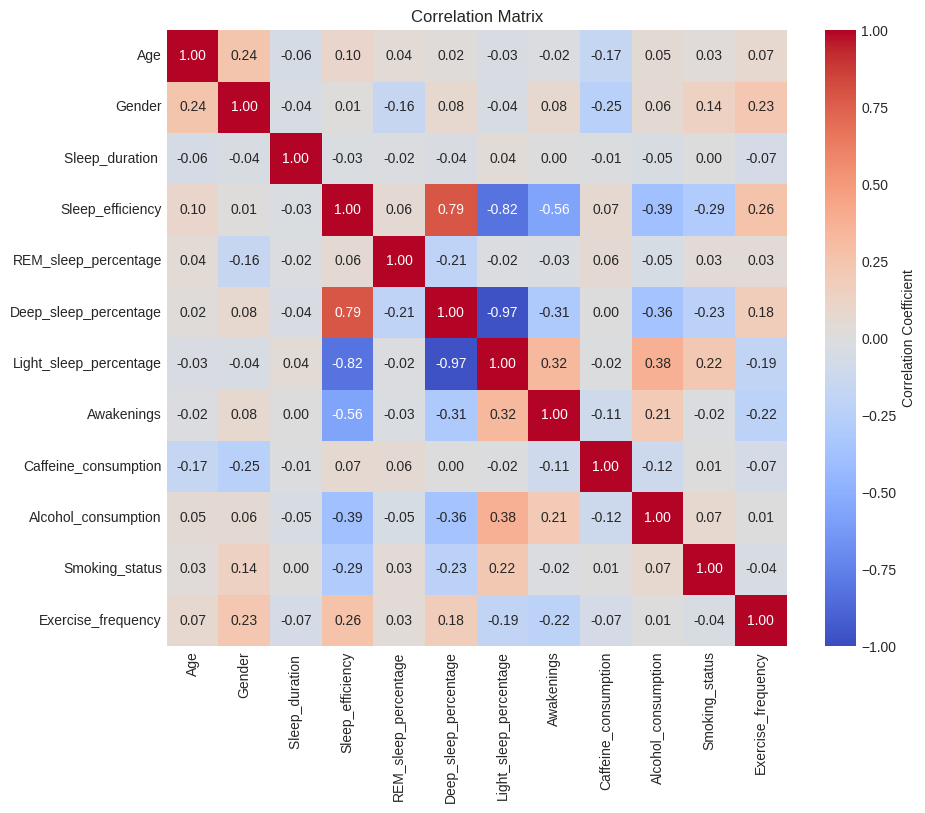

In [15]:
# Only selecting the numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Display the correlation matrix of the data
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.Age.value_counts()

Age
52    19
27    19
37    18
48    17
40    17
      ..
15     1
11     1
9      1
16     1
12     1
Name: count, Length: 61, dtype: int64

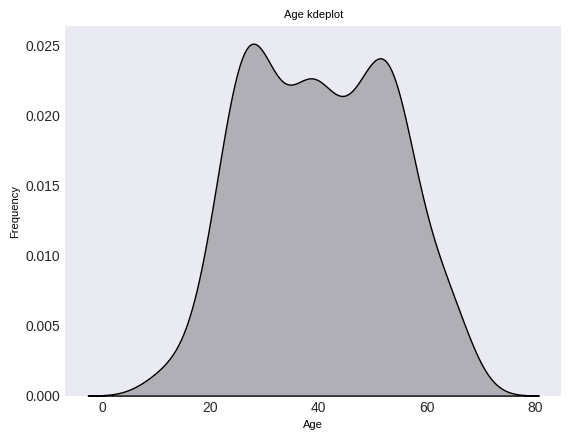

In [17]:
sns.kdeplot(data=df, x="Age",color="black",fill=True)
plt.xlabel("Age", color="black", fontsize=8)
plt.ylabel("Frequency", color="black", fontsize=8)
plt.title("Age kdeplot", color="black",fontsize=8)
plt.show()

In [18]:
df.Gender.value_counts()

Gender
1    228
0    224
Name: count, dtype: int64

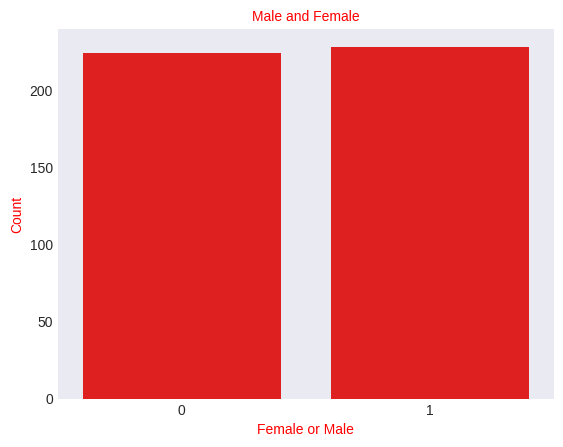

In [19]:
sns.countplot(data=df,x="Gender", color="red")
plt.xlabel("Female or Male", color="red",fontsize=10)
plt.ylabel("Count", color="red",fontsize=10)
plt.title("Male and Female", color="red",fontsize=10)
plt.show()


In [20]:
df.Smoking_status.value_counts()

Smoking_status
0    298
1    154
Name: count, dtype: int64

#Smoking Hypothesis: Smoking negatively affects sleep efficiency, leading to reduced REM and deep sleep stages.

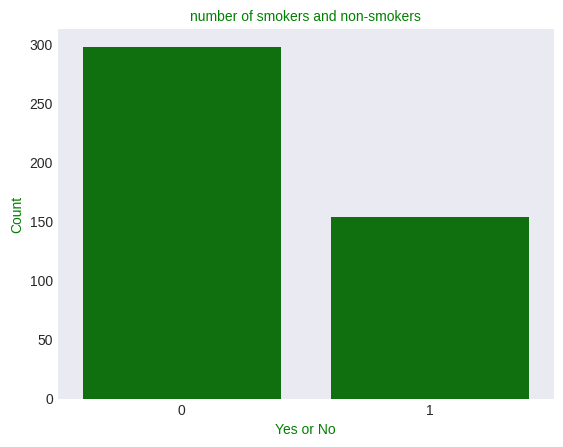

In [21]:
sns.countplot(data=df,x="Smoking_status", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Count", color="green",fontsize=10)
plt.title("number of smokers and non-smokers", color="green",fontsize=10)
plt.show()


# Does smoking affect sleep patterns?

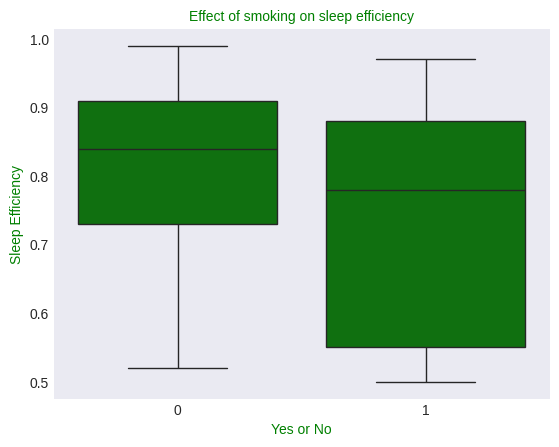

In [22]:
sns.boxplot(data=df,x="Smoking_status",y="Sleep_efficiency", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Sleep Efficiency", color="green",fontsize=10)
plt.title("Effect of smoking on sleep efficiency", color="green",fontsize=10)
plt.show()

The box plot above shows that smoking has some effect on the sleeping efficiency.

#Lets check the distribution of the light, deep and REM sleep percentage.

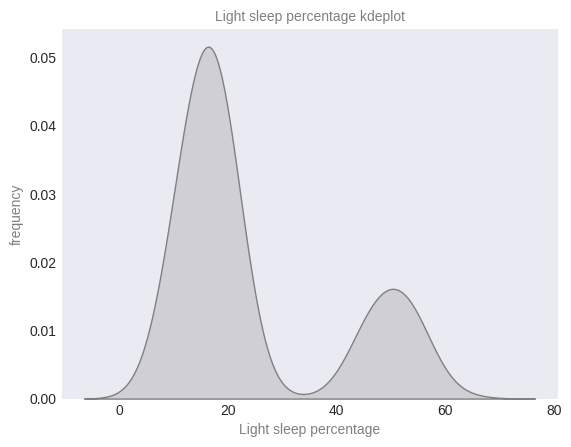

In [23]:
sns.kdeplot(data=df, x="Light_sleep_percentage",color="gray",fill=True)
plt.xlabel("Light sleep percentage", color="gray", fontsize=10)
plt.ylabel("frequency", color="gray", fontsize=10)
plt.title("Light sleep percentage kdeplot", color="gray",fontsize=10)
plt.show()

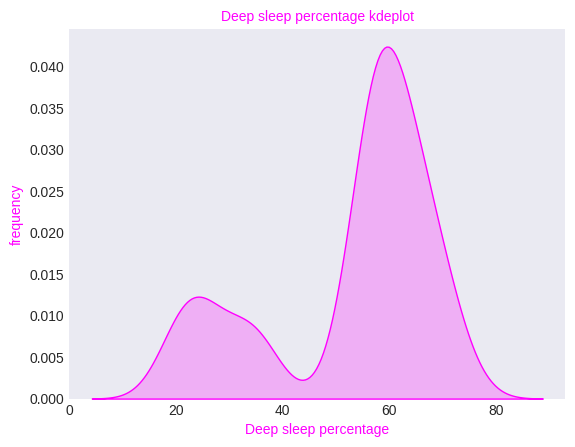

In [24]:
sns.kdeplot(data=df, x="Deep_sleep_percentage",color="magenta",fill=True)
plt.xlabel("Deep sleep percentage", color="magenta", fontsize=10)
plt.ylabel("frequency", color="magenta", fontsize=10)
plt.title("Deep sleep percentage kdeplot", color="magenta",fontsize=10)
plt.show()

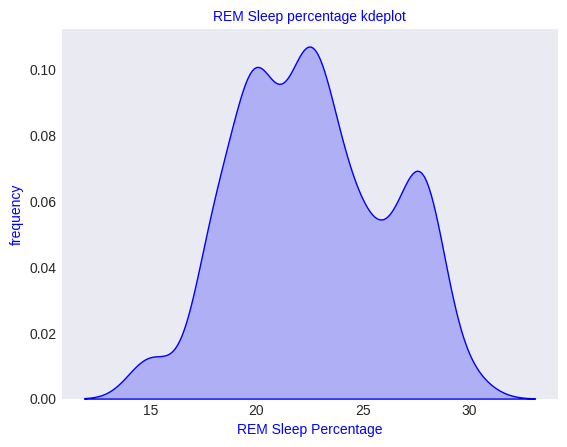

In [25]:
sns.kdeplot(data=df, x="REM_sleep_percentage",color="blue",fill=True)
plt.xlabel("REM Sleep Percentage", color="blue", fontsize=10)
plt.ylabel("frequency", color="blue", fontsize=10)
plt.title("REM Sleep percentage kdeplot", color="blue",fontsize=10)
plt.show()

#Lets compare the Light and Deep Sleep percentage of those who smoke with those who do not.

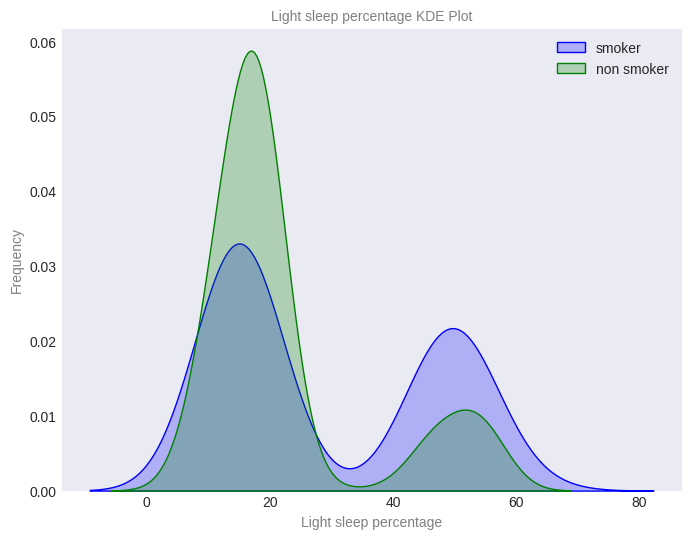

In [26]:
# Plotting KDE plot for each gender
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['Smoking_status'] == 1], x="Light_sleep_percentage", color="blue", fill=True, label="smoker")
sns.kdeplot(data=df[df['Smoking_status'] == 0], x="Light_sleep_percentage", color="green", fill=True, label="non smoker")
plt.xlabel("Light sleep percentage", color="gray", fontsize=10)
plt.ylabel("Frequency", color="gray", fontsize=10)
plt.title("Light sleep percentage KDE Plot", color="gray", fontsize=10)
plt.legend()
plt.show()

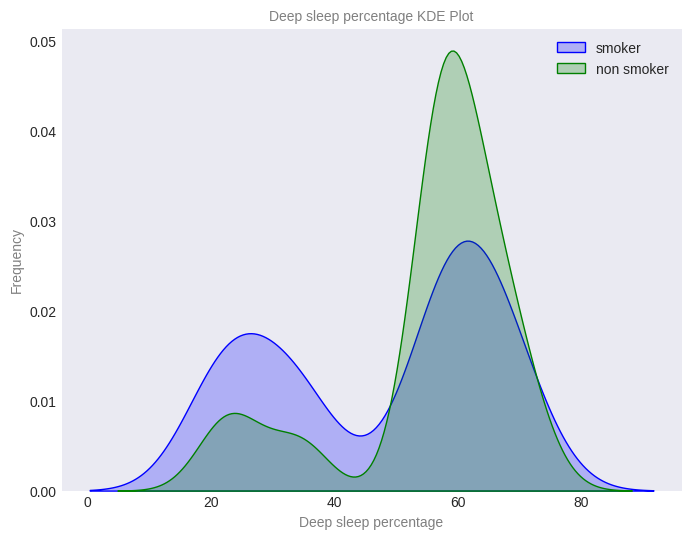

In [27]:
# Plotting KDE plot for each gender
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['Smoking_status'] == 1], x="Deep_sleep_percentage", color="blue", fill=True, label="smoker")
sns.kdeplot(data=df[df['Smoking_status'] == 0], x="Deep_sleep_percentage", color="green", fill=True, label="non smoker")
plt.xlabel("Deep sleep percentage", color="gray", fontsize=10)
plt.ylabel("Frequency", color="gray", fontsize=10)
plt.title("Deep sleep percentage KDE Plot", color="gray", fontsize=10)
plt.legend()
plt.show()

The graph above show that on average, smokers get way less Deep sleep percentage than non smokers.

The graphs above clearly demonstrate how smoking affects a person's sleep. They show that smoking tends to decrease the duration of deep sleep while increasing the duration of light sleep.

# Exercise frequency hypothesis: Regular exercise positively affects sleep efficiency, increasing the duration of deep sleep and REM sleep.

In [28]:
df.Exercise_frequency.value_counts()

Exercise_frequency
3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: count, dtype: int64

lets plot the distribution of the exercise frequency of the population

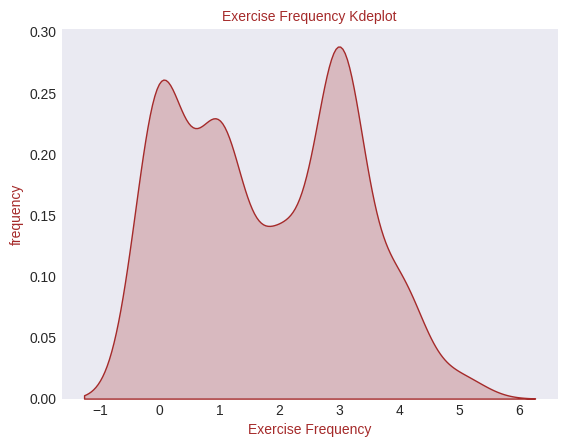

In [29]:
sns.kdeplot(data=df, x="Exercise_frequency",color="brown",fill=True)
plt.xlabel("Exercise Frequency", color="brown", fontsize=10)
plt.ylabel("frequency", color="brown", fontsize=10)
plt.title("Exercise Frequency Kdeplot", color="brown",fontsize=10)
plt.show()

#Does Exercising regularly help with an individual's sleep quality?

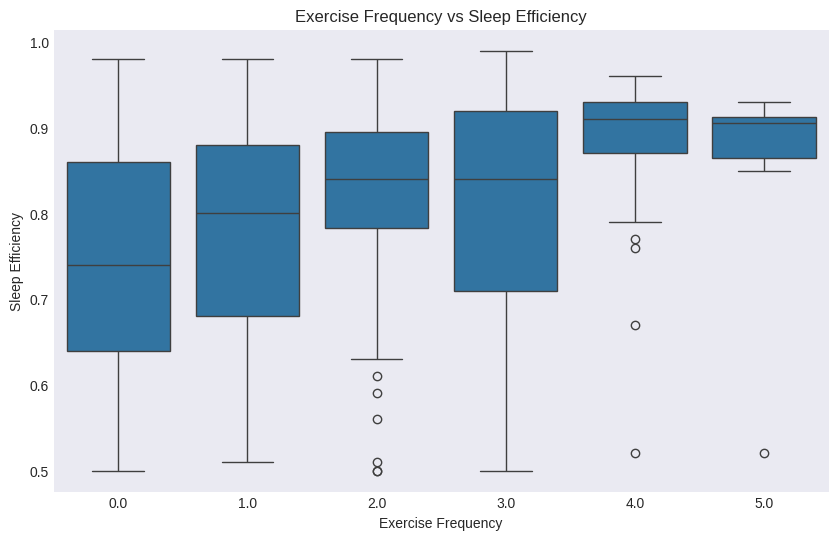

In [30]:
# Box plot for Exercise_frequency vs Sleep Efficiency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Exercise_frequency', y='Sleep_efficiency')
plt.title('Exercise Frequency vs Sleep Efficiency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Sleep Efficiency')
plt.show()

The above graph shows that the more an individual exercises, the higher their sleep efficiency is.

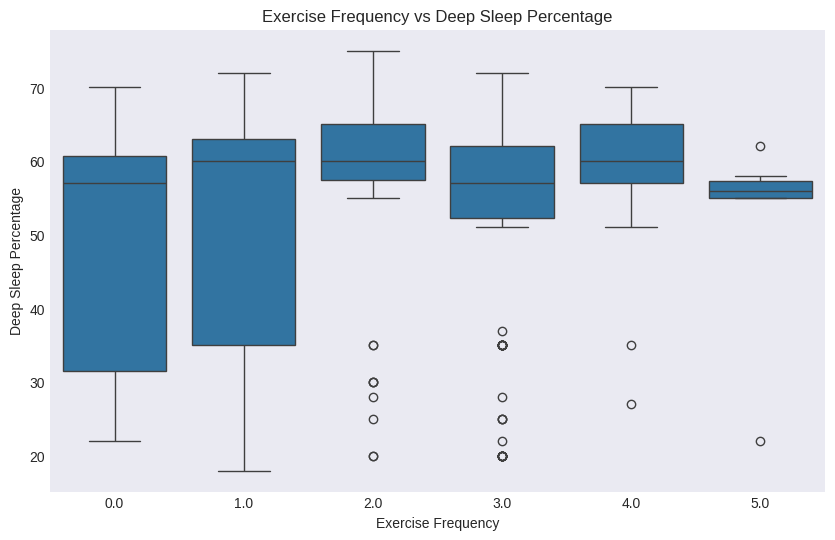

In [31]:
# Box plot for Exercise_frequency vs Deep Sleep Percentage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Exercise_frequency', y='Deep_sleep_percentage')
plt.title('Exercise Frequency vs Deep Sleep Percentage')
plt.xlabel('Exercise Frequency')
plt.ylabel('Deep Sleep Percentage')
plt.show()

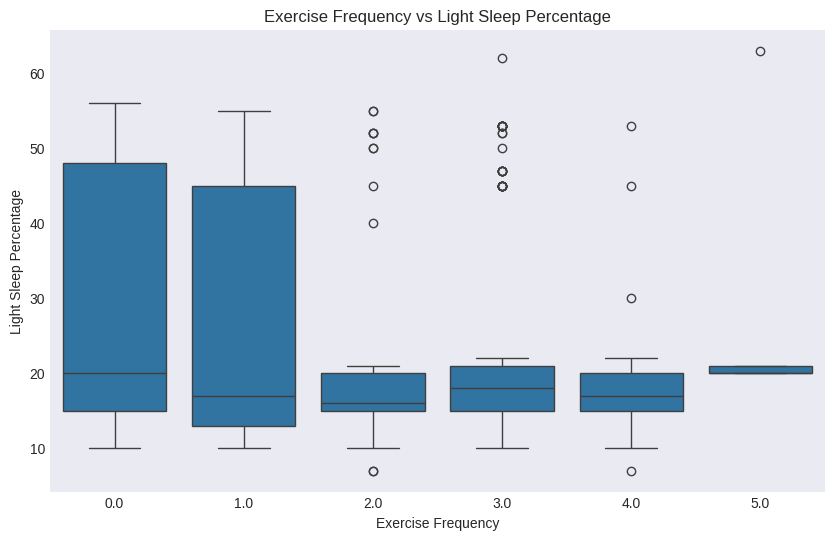

In [32]:
# Box plot for Exercise_frequency vs Light Sleep Percentage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Exercise_frequency', y='Light_sleep_percentage')
plt.title('Exercise Frequency vs Light Sleep Percentage')
plt.xlabel('Exercise Frequency')
plt.ylabel('Light Sleep Percentage')
plt.show()

## The aforementioned visual representations indicate that individuals achieve optimal sleep efficiency when engaging in physical exercise four or five times weekly. Furthermore, it is observed that engaging in physical activity two or more times per week corresponds to the highest occurrence of deep sleep and the lowest occurrence of light sleep.

#Lets plot the distribution of the alcohol consumption of the population.

In [33]:
df.Alcohol_consumption.value_counts()

Alcohol_consumption
0.0    246
1.0     54
3.0     48
2.0     37
5.0     30
4.0     23
Name: count, dtype: int64

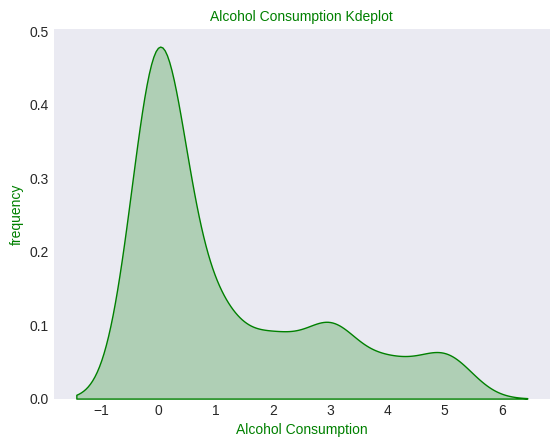

In [34]:
sns.kdeplot(data=df, x="Alcohol_consumption",color="green",fill=True)
plt.xlabel("Alcohol Consumption", color="green", fontsize=10)
plt.ylabel("frequency", color="green", fontsize=10)
plt.title("Alcohol Consumption Kdeplot", color="green",fontsize=10)
plt.show()

The kde plot shows that most of the population do not consume alcohol.

# What is the effect of drinking alcohol on sleep efficiency?

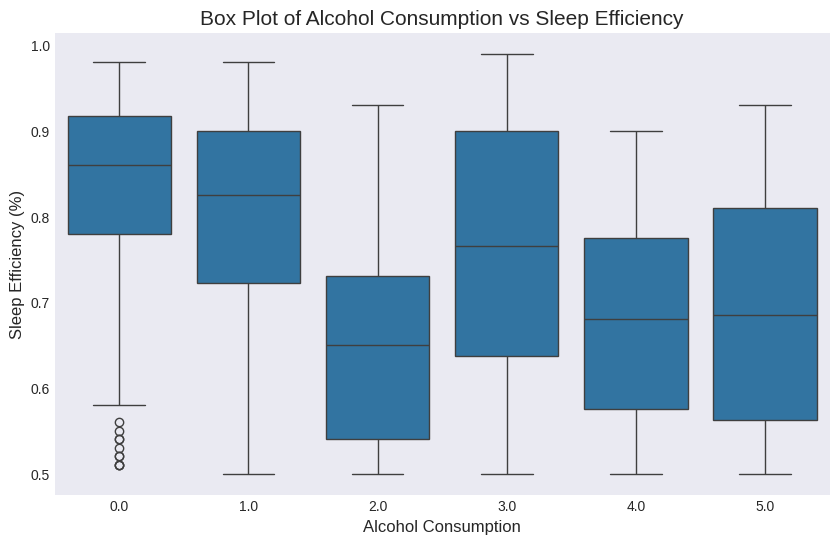

In [35]:
# Box plot for Alcohol Consumption vs Sleep Efficiency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Alcohol_consumption', y='Sleep_efficiency')
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Sleep Efficiency (%)", fontsize=12)
plt.title("Box Plot of Alcohol Consumption vs Sleep Efficiency", fontsize=15)
plt.show()

# While Alcohol might not have an effect on a person's ability to sleep, it will affect their Deep sleep state. "The biggest problem that alcohol causes is insomnia. After a few hours of sleep, alcohol can cause you to wake up and have a difficult time going back to sleep. Alcohol also has a negative effect on Deep sleep," says Dr.

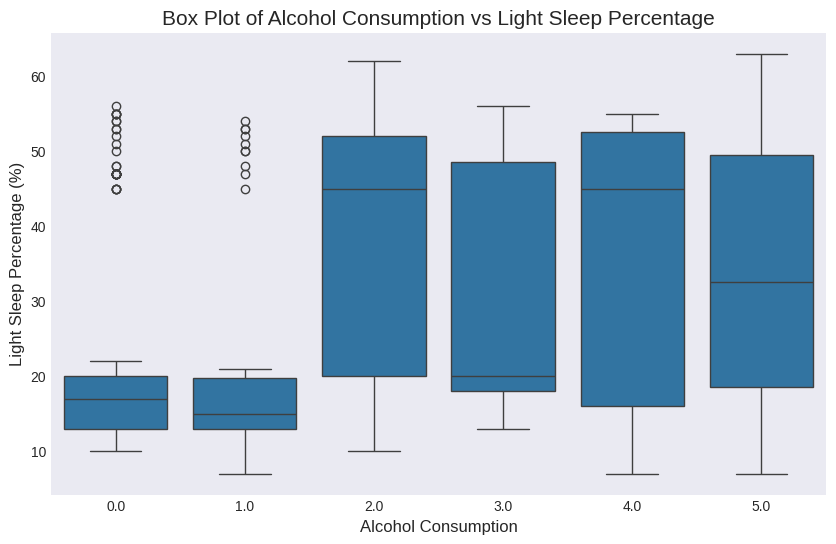

In [36]:
# Box plot for Alcohol Consumption vs Light Sleep Percentage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Alcohol_consumption', y='Light_sleep_percentage')
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Light Sleep Percentage (%)", fontsize=12)
plt.title("Box Plot of Alcohol Consumption vs Light Sleep Percentage", fontsize=15)
plt.show()

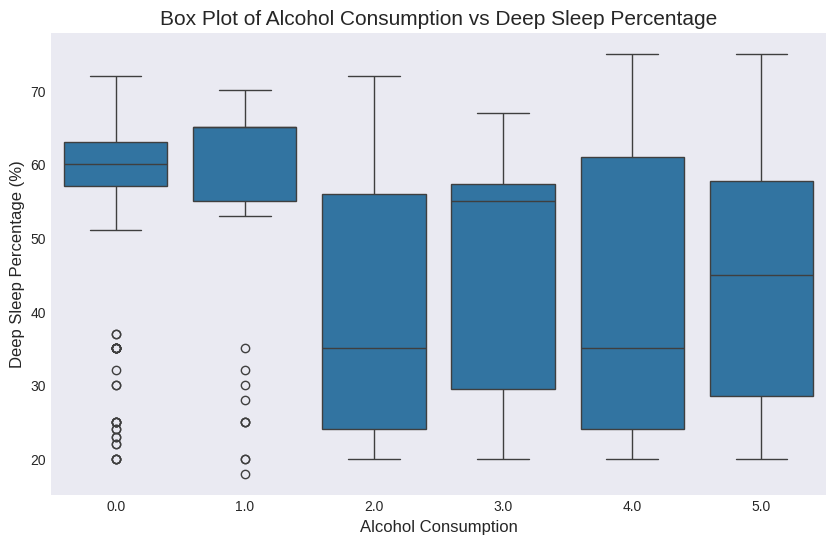

In [37]:
# Box plot for Alcohol Consumption vs Light Sleep Percentage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Alcohol_consumption', y='Deep_sleep_percentage')
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Deep Sleep Percentage (%)", fontsize=12)
plt.title("Box Plot of Alcohol Consumption vs Deep Sleep Percentage", fontsize=15)
plt.show()

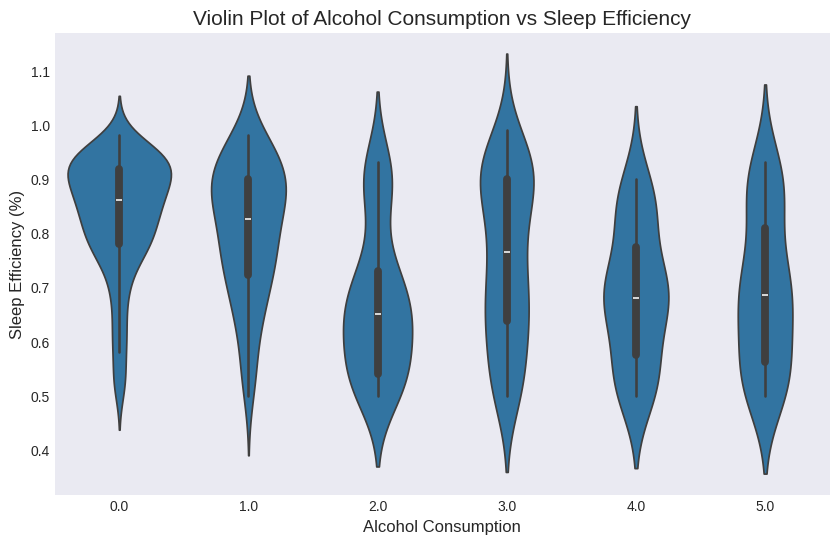

In [38]:
# Violin plot for Alcohol Consumption vs Sleep Efficiency
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Alcohol_consumption', y='Sleep_efficiency')
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Sleep Efficiency (%)", fontsize=12)
plt.title("Violin Plot of Alcohol Consumption vs Sleep Efficiency", fontsize=15)
plt.show()

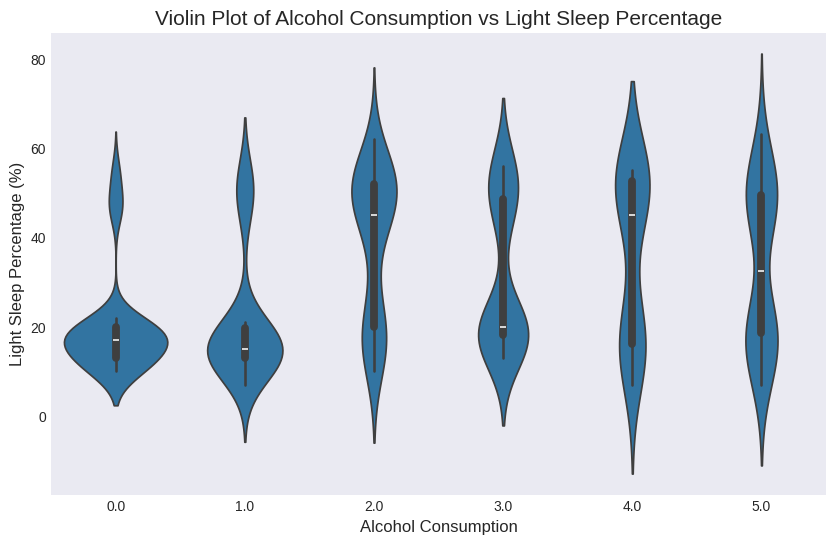

In [39]:
# Violin plot for Alcohol Consumption vs Light Sleep Percentage
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Alcohol_consumption', y='Light_sleep_percentage')
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Light Sleep Percentage (%)", fontsize=12)
plt.title("Violin Plot of Alcohol Consumption vs Light Sleep Percentage", fontsize=15)
plt.show()

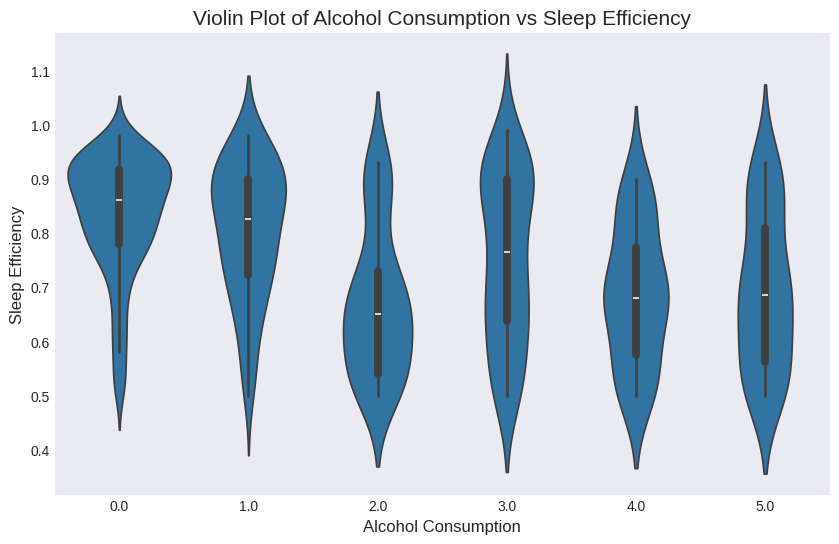

In [40]:
# Violin plot for Alcohol Consumption vs Light Sleep Percentage
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Alcohol_consumption', y='Sleep_efficiency')
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Sleep Efficiency", fontsize=12)
plt.title("Violin Plot of Alcohol Consumption vs Sleep Efficiency", fontsize=15)
plt.show()

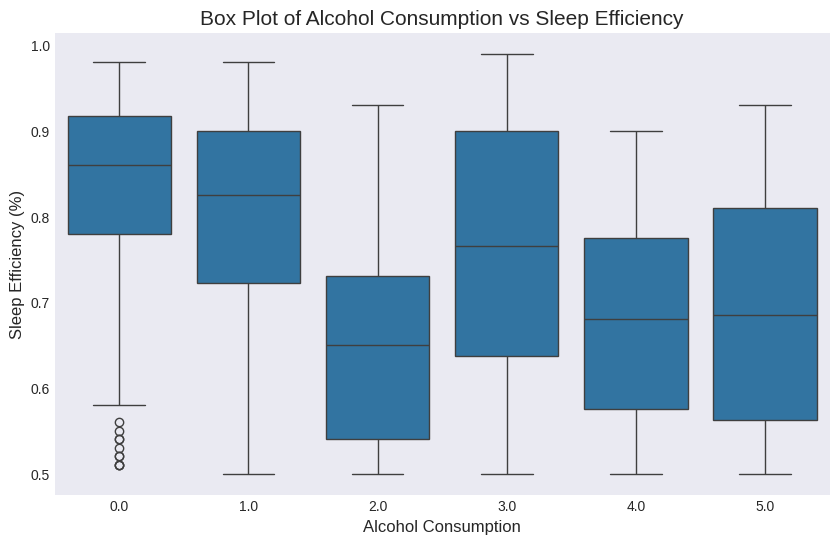

In [41]:
# Box plot for Alcohol Consumption vs Sleep Efficiency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Alcohol_consumption', y='Sleep_efficiency')
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Sleep Efficiency (%)", fontsize=12)
plt.title("Box Plot of Alcohol Consumption vs Sleep Efficiency", fontsize=15)
plt.show()

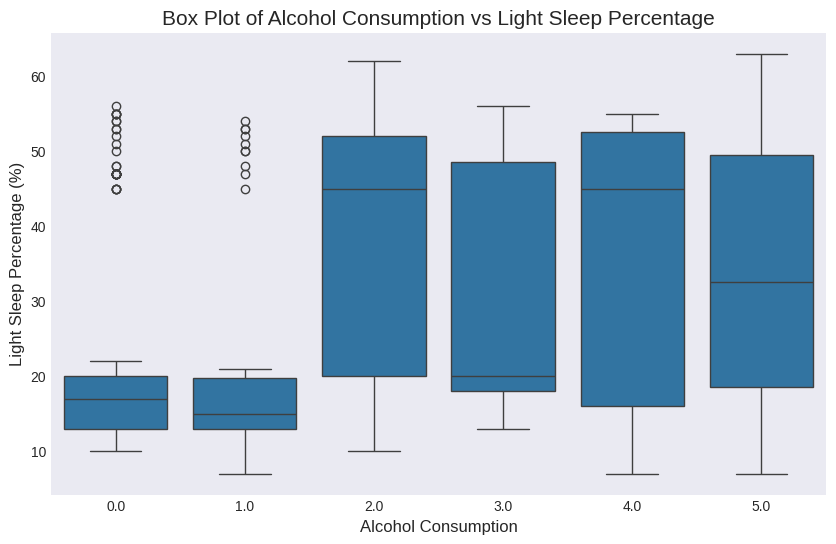

In [42]:
# Box plot for Alcohol Consumption vs Light Sleep Percentage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Alcohol_consumption', y='Light_sleep_percentage')
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Light Sleep Percentage (%)", fontsize=12)
plt.title("Box Plot of Alcohol Consumption vs Light Sleep Percentage", fontsize=15)
plt.show()

The graph above demonstrates that drinking alcohol negatively affects sleep quality by increasing the time spent in light sleep and decreasing the time spent in deep sleep.

# Lets plot the distribution of the caffeine consumption effect on an individual's sleep efficiency.

In [43]:
df.Caffeine_consumption.value_counts()

Caffeine_consumption
0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: count, dtype: int64

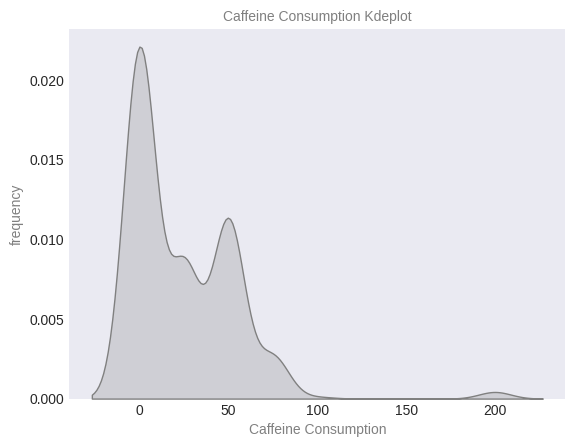

In [44]:
sns.kdeplot(data=df, x="Caffeine_consumption",color="grey",fill=True)
plt.xlabel("Caffeine Consumption", color="grey", fontsize=10)
plt.ylabel("frequency", color="grey", fontsize=10)
plt.title("Caffeine Consumption Kdeplot", color="grey",fontsize=10)
plt.show()

# Does caffeine consumption affect sleep?

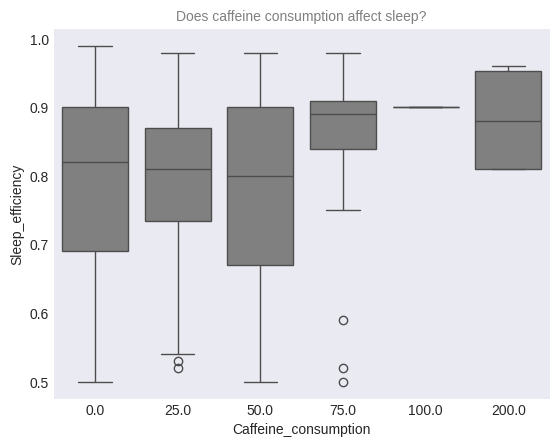

In [45]:
sns.boxplot(data=df,x="Caffeine_consumption",y="Sleep_efficiency", color="grey")
plt.title("Does caffeine consumption affect sleep?", color="grey",fontsize=10)
plt.show()

## We understand from the graph above that taking caffeine has little to no effect on sleep efficiency.

In [46]:
df.Awakenings.value_counts()

Awakenings
1.0    154
0.0     95
3.0     63
4.0     63
2.0     57
Name: count, dtype: int64

Lets plot the awakenings distribution of the population

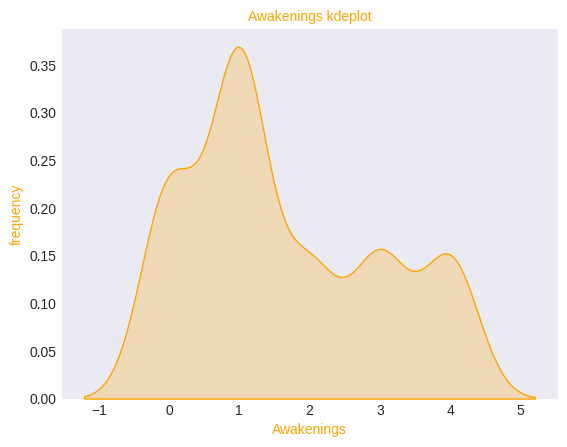

In [47]:
sns.kdeplot(data=df, x="Awakenings",color="orange",fill=True)
plt.xlabel("Awakenings", color="orange", fontsize=10)
plt.ylabel("frequency", color="orange", fontsize=10)
plt.title("Awakenings kdeplot", color="orange",fontsize=10)
plt.show()

# Usually the number of awakenings is one or 0.

In [48]:
df.Light_sleep_percentage.value_counts()

Light_sleep_percentage
20    52
15    49
17    46
18    45
10    34
13    32
12    28
45    20
21    17
52    16
47    16
53    13
55    13
16    12
19    11
48    10
54     8
50     7
22     4
56     3
51     3
14     3
7      3
11     2
62     1
46     1
30     1
40     1
63     1
Name: count, dtype: int64

In [49]:
df.Deep_sleep_percentage.value_counts()

Deep_sleep_percentage
60    70
65    44
55    43
57    35
70    34
35    27
58    26
63    20
67    19
20    18
25    17
22    12
62     9
59     9
56     9
23     8
72     8
30     8
28     7
32     6
52     5
75     4
24     4
37     3
53     2
51     2
27     1
18     1
40     1
Name: count, dtype: int64

# Does the number of times you wake up while sleeping have an effect on deep sleep?

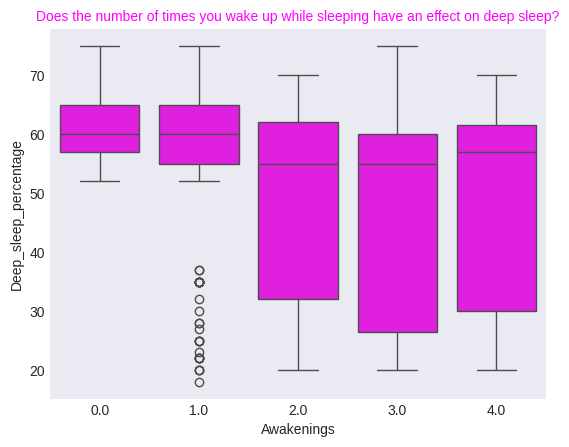

In [50]:
sns.boxplot(data=df,x="Awakenings",y="Deep_sleep_percentage", color="magenta")
plt.title("Does the number of times you wake up while sleeping have an effect on deep sleep?", color="magenta",fontsize=10)
plt.show()

# In a night, the quality of sleep decreases with each waking up.

In [51]:
df.REM_sleep_percentage.value_counts()

REM_sleep_percentage
20    92
22    67
28    58
23    56
18    49
25    31
24    26
27    25
26    15
15    14
19    11
30     7
21     1
Name: count, dtype: int64

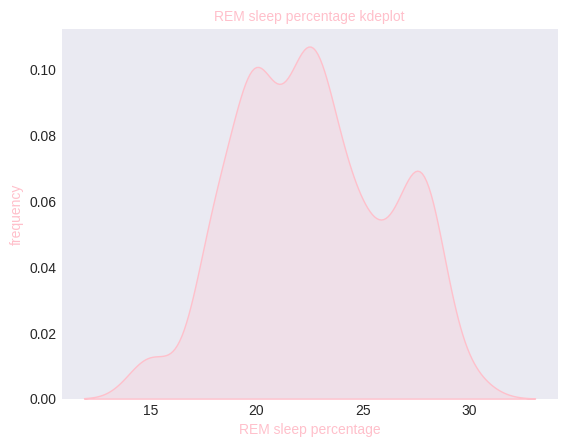

In [52]:
sns.kdeplot(data=df, x="REM_sleep_percentage",color="pink",fill=True)
plt.xlabel("REM sleep percentage", color="pink", fontsize=10)
plt.ylabel("frequency", color="pink", fontsize=10)
plt.title("REM sleep percentage kdeplot", color="pink",fontsize=10)
plt.show()

In [53]:
df.Sleep_efficiency.value_counts()

Sleep_efficiency
0.90    29
0.93    22
0.87    22
0.95    21
0.91    19
0.94    18
0.92    13
0.77    13
0.88    13
0.81    12
0.86    12
0.84    12
0.85    12
0.72    12
0.80    11
0.82    11
0.71    11
0.83    10
0.52     9
0.68     9
0.78     9
0.63     9
0.75     8
0.50     8
0.64     8
0.79     8
0.67     8
0.54     8
0.51     8
0.76     7
0.73     7
0.66     7
0.89     7
0.55     7
0.96     7
0.53     6
0.60     6
0.65     4
0.74     4
0.62     4
0.98     4
0.70     3
0.58     3
0.61     2
0.57     2
0.56     2
0.59     2
0.99     1
0.69     1
0.97     1
Name: count, dtype: int64

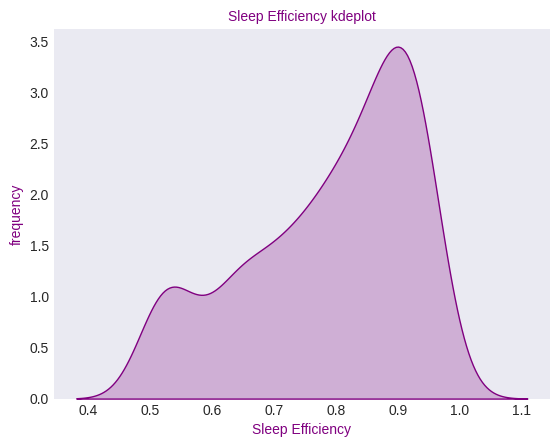

In [54]:
sns.kdeplot(data=df, x="Sleep_efficiency",color="purple",fill=True)
plt.xlabel("Sleep Efficiency", color="purple", fontsize=10)
plt.ylabel("frequency", color="purple", fontsize=10)
plt.title("Sleep Efficiency kdeplot", color="purple",fontsize=10)
plt.show()

In [55]:
df.head()

,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,65,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,69,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,40,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,57,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


In [56]:
# Extract the hour of bedtime from the date
df['Date'] = pd.to_datetime(df['Bedtime'], errors='coerce')
df['hour'] = (df['Date']).dt.hour

In [57]:
df['hour'].value_counts()

hour
0     110
22     83
21     73
1      67
2      64
23     55
Name: count, dtype: int64

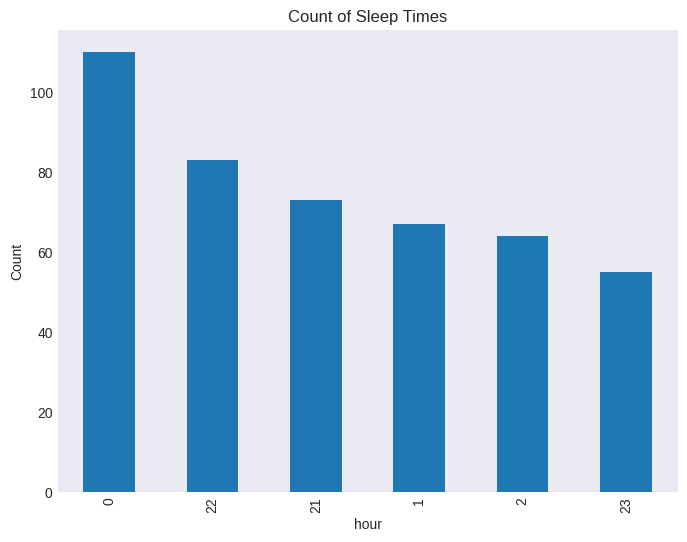

In [58]:
# Plotting the count of sleep times
plt.figure(figsize=(8, 6))
df['hour'].value_counts().plot(kind='bar')
plt.title('Count of Sleep Times')
plt.xlabel('hour')
plt.ylabel('Count')
plt.show()

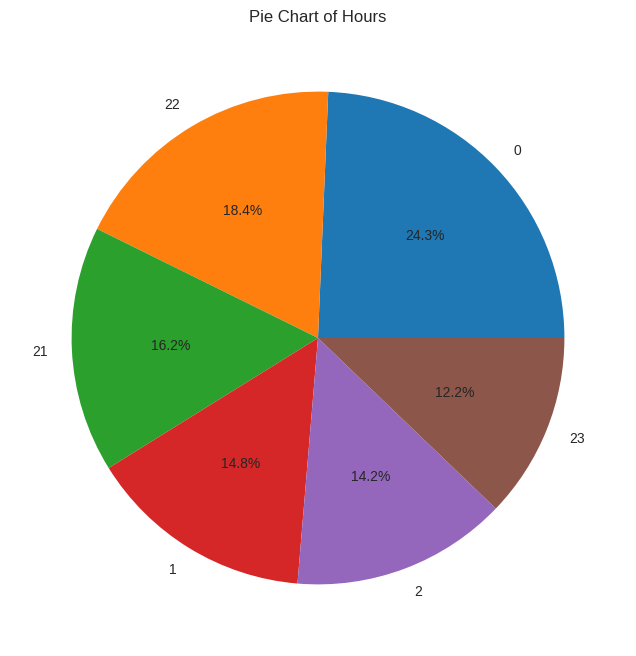

In [59]:
hour_counts = df['hour'].value_counts()

# plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(hour_counts, labels=hour_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Hours')
plt.show()

# In general, bedtime is preferred as 12 at night.

In [60]:
# Extracting the wakeup time from the date
df['Datew'] = pd.to_datetime(df['Wakeup_time'], errors='coerce')
df['hourw'] = (df['Datew']).dt.hour

In [61]:
df['hourw'].value_counts()

hourw
5     80
7     78
9     74
6     64
8     60
4     43
10    35
3     10
11     6
12     2
Name: count, dtype: int64

<ipython-input-62-b2457ec63a46>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="hourw", palette="ocean")


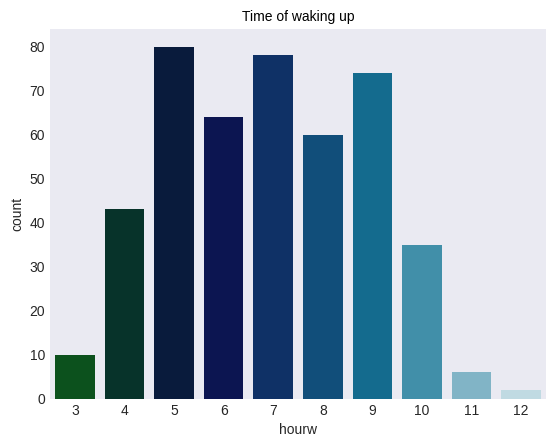

In [62]:
sns.countplot(data=df, x="hourw", palette="ocean")
plt.title("Time of waking up", color="black",fontsize=10)
plt.show()

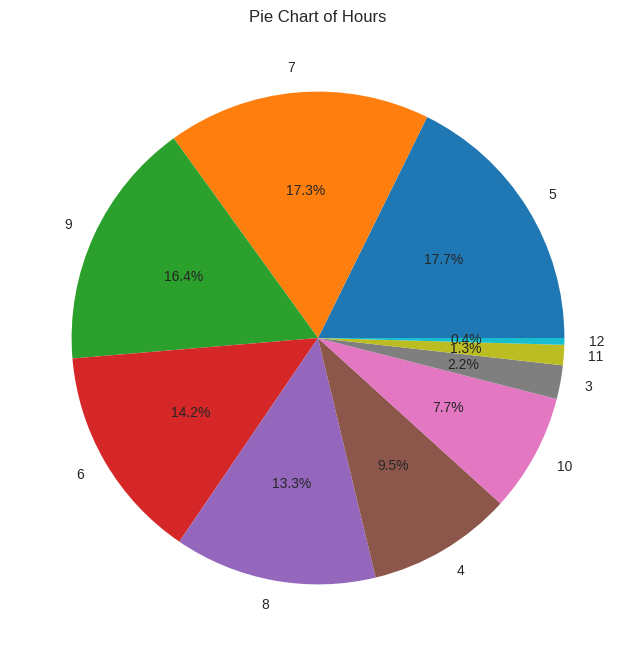

In [63]:
hour_counts = df['hourw'].value_counts()

#Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(hour_counts, labels=hour_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Hours')
plt.show()

# More than 50% of the individuals wake up at 5, 7 and 9 am.

##Now lets test the hypothesis statements by doing a z-test to whether reject or fail to reject the null hypothesis

In [64]:
smokers = df[df['Smoking_status'] == 1]['Sleep_efficiency']
non_smokers = df[df['Smoking_status'] == 0]['Sleep_efficiency']

mean_smokers = np.mean(smokers)
mean_non_smokers = np.mean(non_smokers)
std_smokers = np.std(smokers)
std_non_smokers = np.std(non_smokers)
n_smokers = len(smokers)
n_non_smokers = len(non_smokers)

# The z-score
z_score = (mean_smokers - mean_non_smokers) / np.sqrt((std_smokers**2 / n_smokers) + (std_non_smokers**2 / n_non_smokers))

alpha = 0.05

# Calculating the p value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis: Smoking affects sleep efficiency.")
else:
    print("Fail to reject the null hypothesis: No significant effect of smoking on sleep efficiency.")


1.0534925598548739e-08
Reject the null hypothesis: Smoking affects sleep efficiency.


In [65]:
alcohol_consumers = df[df['Alcohol_consumption'] != 0]['Sleep_efficiency']
sleep_efficiency = df['Sleep_efficiency']

mean_alcohol = np.mean(alcohol_consumers)
mean_non_alcohol = np.mean(sleep_efficiency)
std_alcohol = np.std(alcohol_consumers)
std_non_alcohol = np.std(sleep_efficiency)
n_alcohol = len(alcohol_consumers)
n_non_alcohol = len(sleep_efficiency)

# The z-score
z_score = (mean_alcohol - mean_non_alcohol) / np.sqrt((std_alcohol**2 / n_alcohol) + (std_non_alcohol**2 / n_non_alcohol))

alpha = 0.05

# Calculating the p value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis: Alcohol consumption affects sleep efficiency.")
else:
    print("Fail to reject the null hypothesis: No significant effect of alcohol consumption on sleep efficiency.")


1.5151001199864567e-05
Reject the null hypothesis: Alcohol consumption affects sleep efficiency.


In [66]:
Exercise_num = df[df['Exercise_frequency'] != 0]['Sleep_efficiency']
sleep_efficiency = df[df['Exercise_frequency'] == 0]['Sleep_efficiency']

mean_exercise = np.mean(Exercise_num)
mean_non_exercise = np.mean(sleep_efficiency)
std_exercise = np.std(Exercise_num)
std_non_exercise = np.std(sleep_efficiency)
n_exercise = len(Exercise_num)
n_non_exercise = len(sleep_efficiency)

# The z-score
z_score = (mean_exercise - mean_non_exercise) / np.sqrt((std_exercise**2 / n_exercise) + (std_non_exercise**2 / n_non_exercise))

alpha = 0.05

# Calculating the p value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis: Exercising affects sleep efficiency.")
else:
    print("Fail to reject the null hypothesis: No significant effect of alcohol consumption on sleep efficiency.")


3.0751582149379786e-05
Reject the null hypothesis: Exercising affects sleep efficiency.


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the features with the highest relations with sleep efficiency
features = ['Deep_sleep_percentage', 'Light_sleep_percentage', 'Awakenings',
            'Alcohol_consumption', 'Smoking_status', 'Exercise_frequency']
target = 'Sleep_efficiency'

X = df[features]
y = df[target]

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Finding the importance of the features selected
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importances)

Mean Squared Error: 0.0030441573594894
R^2 Score: 0.8364944323836512
                  Feature  Importance
1  Light_sleep_percentage    0.450062
0   Deep_sleep_percentage    0.329261
2              Awakenings    0.139339
4          Smoking_status    0.034026
3     Alcohol_consumption    0.024328
5      Exercise_frequency    0.022985


In [81]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0026604992146962094
R^2 Score: 0.8571011998161888
                  Feature  Importance
1  Light_sleep_percentage    0.450062
0   Deep_sleep_percentage    0.329261
2              Awakenings    0.139339
4          Smoking_status    0.034026
3     Alcohol_consumption    0.024328
5      Exercise_frequency    0.022985
